## 과대적합과 과소적합
- 특정 조건만 너무 학습하여 편향된 경우를 과적합이라고 한다.
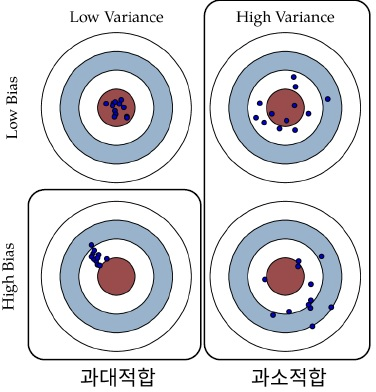

## 이것이 우리가 데이터셋을 만들어야 하는 이유이다.
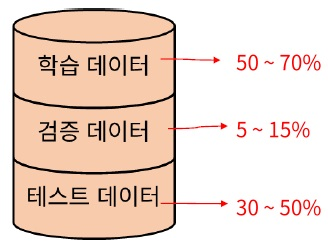
- 학습 데이터(Training Data) : 학습과정에 보여지고, 실제 모델을 학습하는 데에 사용되는 데이터
- 검증 데이터(Validation Data) : 학습 과정에 보여지는 데이터이지만, 모델 학습에 사용하지 않고 학습이 잘 되는지 검증하는 데에만 사용
- 테스트 데이터(Test Data) : 학습 과정에서는 사용하지 않고, 학습을 마친 모델을 평가하기 위해 단 한번만 사용함

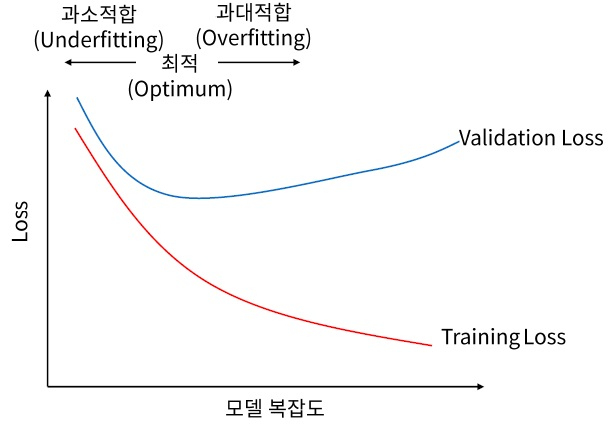
- Epoch가 아닌 모델 복잡도이다!
### 문제의 난이도에 비해 모델 복잡도가 너무 낮으면 과소적합이 발생한다.
### 반대로 문제를 너무 어렵게 풀다보면 과대 적합이 발생한다.

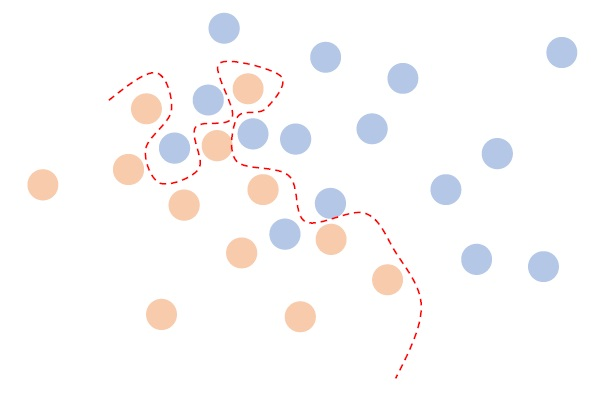
- 이진 분류 문제에서 발생하는 Overfitting
- 시험의 족보를 달달 외우듯 **주어진 문제의 답을 암기해버리는 것과 같음**

## 일반적인 손실 함수 그래프
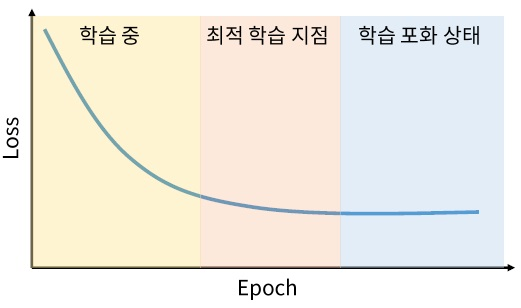
- 학습 데이터만을 이용하여 학습한다면 위와 같이 판단하는 것이 합리적임

## 하지만 현실은
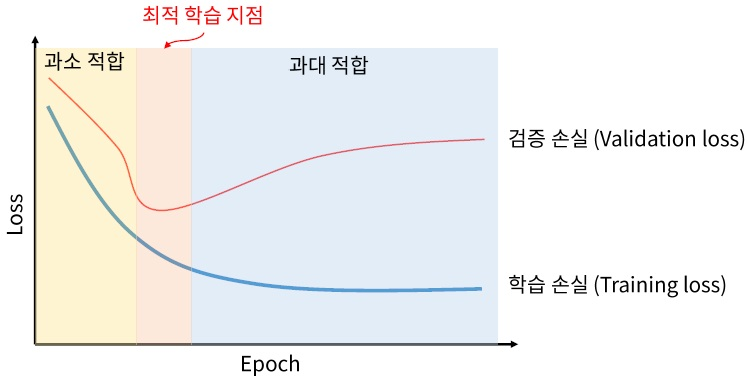
- 실제로 학습을 진행하다 보면, 학습 데이터에 **과적합되는 현상이 발생한다.**

## 이를 제거할 수 있는 간단한 방법 : 학습 조기 종료(Early Stopping)
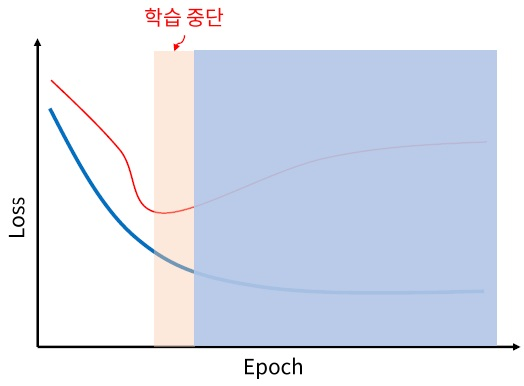
- Validation Loss가 여러 Epoch동안 감소하지 않으면 Overfitting으로 간주하여 학습을 중단하는 기법

## Drop-out
### 기존 Fully-Connetec Layer : 전결합 계층
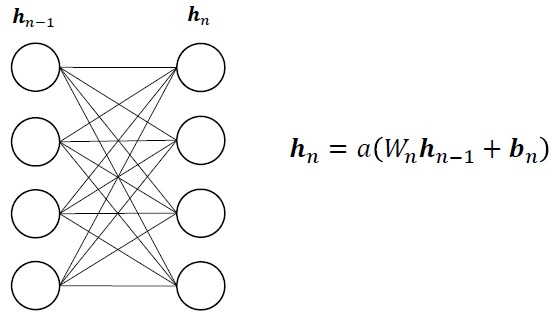

### Drop-out : 0~1 사이의 확률로 뉴런을 제거하는 법
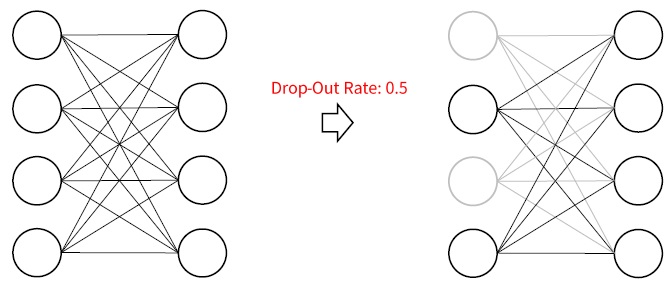

### 정확히는 뭐야?
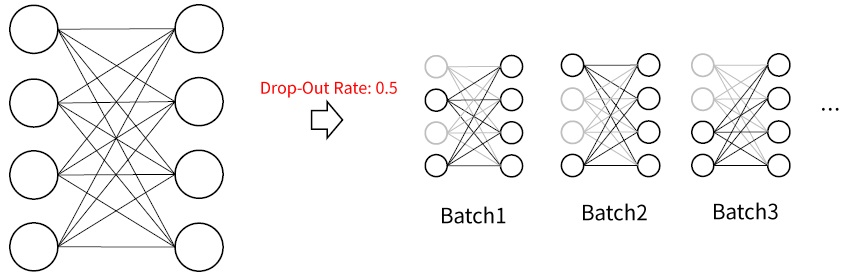
- Mini-Batch 학습을 할 때, 각 배치별로 매번 새로운 Drop-Out을 적용하여 학습하는 기법

### 단 추론 단계에서는 모든 뉴런을 함께 사용함에 유의
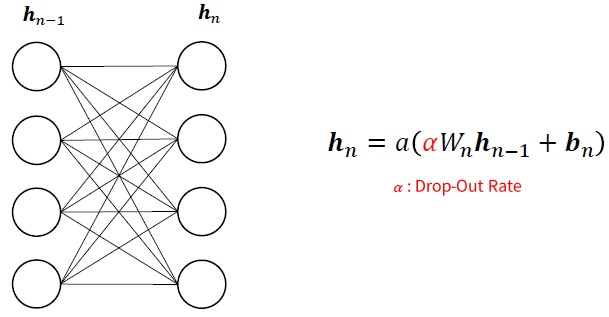
- 이때 Scaling을 적용함.
  - 공식에 a가 곱해지는 것을 알 수 있음
  - 각 확률로 끊어져/합쳐져 있는 것이기 때문에, 이를 단순 합 연산을 진행해주면 잘못된 결과가 나올 가능성이 있음

## Drop-out의 의미
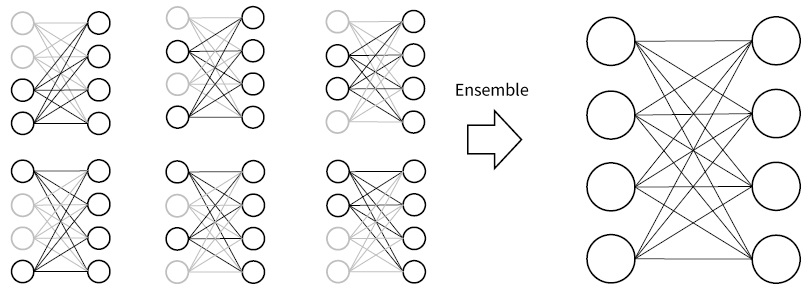
- 일종의 앙상블 모델이라 생각하면 편리함
- 일부의 특징(Drop-out의 특정 Realization)만을 사용해서 좋은 결과를 낼 수 있음
- 각각의 가능성에 대해 좋은 결과를 내도록 학습할 경우, 이를 평균하면 균형있는 결과를 얻는다.
  - 이는 어느 특정한 Feature에 집중하여 Overfitting되는 결과를 막아준다.

## Overfitting 방지 실습

In [2]:
#import module
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#하이퍼 파라미터 정의
EPOCHS=50

In [20]:
#네트워크 구조 정의
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.flatten = tf.keras.layers.Flatten()                       # 28x28 = 784
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(64, activation='relu')
        self.dense4 = tf.keras.layers.Dense(64, activation='relu')
        self.dropout4 = tf.keras.layers.Dropout(0.5)#dropout 적용 시 이곳에 작성됨
        self.dense5 = tf.keras.layers.Dense(10, activation='softmax')  # 10
        #모든 크기가 64로 고정되어있는 특징을 가짐

    def call(self, x, training=False, mask=None):
        h = self.flatten(x)
        h = self.dense1(h)
        h = self.dense2(h)
        h = self.dense3(h)
        h = self.dense4(h)
        h = self.dropout4(h)
        return self.dense5(h)

In [4]:
#데이터 불러오기
#mnist가 아닌 fashion_mnist라는 0~9가지의 클래스를 구분하는 데이터셋을 사용
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32).prefetch(2048)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32).prefetch(2048)

4431872/4422102 [==============================] - 0s 0us/step


In [17]:
#모델 생성
model = MyModel()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',#sparse 카테고리임에 유의
              metrics=['accuracy'])
#keras를 이용하다면 model fit을 손쉽게 할 수 있다는 장점이 있음

In [6]:
#모델 학습
history = model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS)

Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5194 - accuracy: 0.8133 - val_loss: 0.4346 - val_accuracy: 0.8401
Epoch 2/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3852 - accuracy: 0.8587 - val_loss: 0.4228 - val_accuracy: 0.8468
Epoch 3/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3490 - accuracy: 0.8721 - val_loss: 0.3914 - val_accuracy: 0.8571
Epoch 4/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3262 - accuracy: 0.8804 - val_loss: 0.3623 - val_accuracy: 0.8692
Epoch 5/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3096 - accuracy: 0.8844 - val_loss: 0.3928 - val_accuracy: 0.8545
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2979 - accuracy: 0.8891 - val_loss: 0.3591 - val_accuracy: 0.8687
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2838 - accuracy: 0.8938 - val_loss: 0.3697 - val_accuracy:

- 위의 결과처럼 accuracy는 높아졌는데, loss도 같이 높아지는 경우가 생길 수 있음

Text(0.5, 1.0, 'Training and Validation Loss')

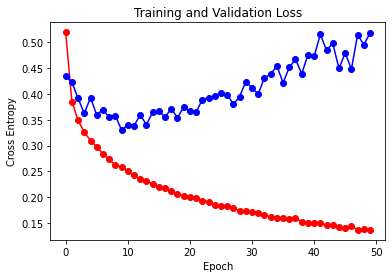

In [7]:
# matplotlib을 이용한 시각화
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure()
plt.plot(loss,'ro-') #빨간 점으로 찍고 연결해줘
plt.plot(val_loss,'bo-') #파란 점으로 찍고 연결해줘
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')

- underfitting / overfitting 구간이 존재함을 확인할 수 있다

## 방법 1. early-stopping callback

- callback : 한번 배치/epoch가 끝날 때/validation/evaluation 등의 상황이 하나 끝날 때마다 실행되는 함수
- early 한번 써보도록 하자 

In [8]:
earlystopper=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=10,#10개까지 참아줌~
                                             verbose=1)#수다쟁이. 하는 과정에서의 특정 출력을 내줄거야~

In [9]:
#모델 학습(early stoppter 버전)
history = model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS, callbacks=[earlystopper])

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1333 - accuracy: 0.9480 - val_loss: 0.4871 - val_accuracy: 0.8943
Epoch 2/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1340 - accuracy: 0.9476 - val_loss: 0.5211 - val_accuracy: 0.8887
Epoch 3/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1315 - accuracy: 0.9498 - val_loss: 0.5673 - val_accuracy: 0.8824
Epoch 4/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1327 - accuracy: 0.9491 - val_loss: 0.5403 - val_accuracy: 0.8899
Epoch 5/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1339 - accuracy: 0.9487 - val_loss: 0.5343 - val_accuracy: 0.8837
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1273 - accuracy: 0.9499 - val_loss: 0.5284 - val_accuracy: 0.8867
Epoch 7/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1273 - accuracy: 0.9511 - val_loss: 0.6090 - val_accuracy:

Text(0.5, 1.0, 'Training and Validation Loss')

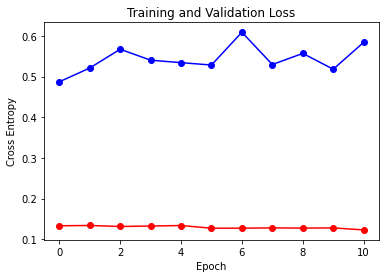

In [10]:
# matplotlib을 이용한 시각화
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure()
plt.plot(loss,'ro-') #빨간 점으로 찍고 연결해줘
plt.plot(val_loss,'bo-') #파란 점으로 찍고 연결해줘
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')

## Drop-out 정의
- 정의는 크게 **네트워크 구조에서 설정하는 것**으로 함

In [ ]:
#모델 학습(early stoppter 버전+마지막 계층에만 dropout(0.5) 적용)
model = MyModel()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',#sparse 카테고리임에 유의
              metrics=['accuracy'])
history = model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS, callbacks=[earlystopper])

Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6372 - accuracy: 0.7771 - val_loss: 0.4470 - val_accuracy: 0.8401
Epoch 2/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4403 - accuracy: 0.8474 - val_loss: 0.4188 - val_accuracy: 0.8484
Epoch 3/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3961 - accuracy: 0.8612 - val_loss: 0.3857 - val_accuracy: 0.8590
Epoch 4/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3715 - accuracy: 0.8702 - val_loss: 0.3723 - val_accuracy: 0.8679
Epoch 5/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3537 - accuracy: 0.8763 - val_loss: 0.3674 - val_accuracy: 0.8679
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3411 - accuracy: 0.8798 - val_loss: 0.3634 - val_accuracy: 0.8737
Epoch 7/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3233 - accuracy: 0.8850 - val_loss: 0.3809 - val_accuracy:

- dropout을 하였는데도 underfitting이 일어난다?
  - **각 계층당 충분한 노드를 설정해주면(64개에서 128개로 변경)** 훌륭하게 될 것임

Text(0.5, 1.0, 'Training and Validation Loss')

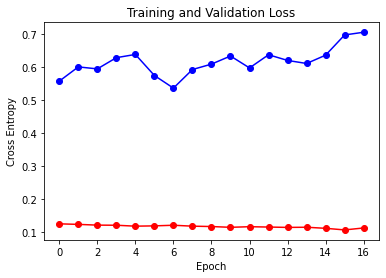

In [13]:
# matplotlib을 이용한 시각화
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure()
plt.plot(loss,'ro-') #빨간 점으로 찍고 연결해줘
plt.plot(val_loss,'bo-') #파란 점으로 찍고 연결해줘
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')

- 생각보다 눈에띄는 차이가 보이지 않음
  - 128개로 조져버려~

In [18]:
#모델 학습(early stoppter 버전+마지막 계층에만 dropout(0.5) 적용)
history = model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS, callbacks=[earlystopper])

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5872 - accuracy: 0.7939 - val_loss: 0.4556 - val_accuracy: 0.8336
Epoch 2/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4149 - accuracy: 0.8527 - val_loss: 0.4060 - val_accuracy: 0.8518
Epoch 3/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3735 - accuracy: 0.8663 - val_loss: 0.3636 - val_accuracy: 0.8724
Epoch 4/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3511 - accuracy: 0.8752 - val_loss: 0.4061 - val_accuracy: 0.8578
Epoch 5/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3321 - accuracy: 0.8802 - val_loss: 0.3862 - val_accuracy: 0.8605
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3219 - accuracy: 0.8856 - val_loss: 0.3526 - val_accuracy: 0.8766
Epoch 7/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3081 - accuracy: 0.8879 - val_loss: 0.3884 - val_accuracy:

Text(0.5, 1.0, 'Training and Validation Loss')

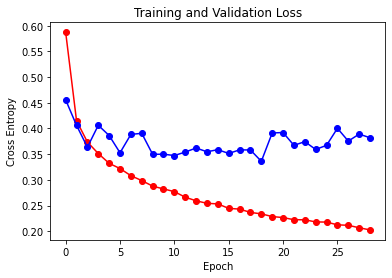

In [19]:
# matplotlib을 이용한 시각화
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure()
plt.plot(loss,'ro-') #빨간 점으로 찍고 연결해줘
plt.plot(val_loss,'bo-') #파란 점으로 찍고 연결해줘
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')